# Day 75: Overview of MLOps Tools and Platforms

Welcome to Day 75 of our machine learning journey! Today, we'll explore the rich ecosystem of MLOps (Machine Learning Operations) tools and platforms that have revolutionized how we develop, deploy, and maintain machine learning models in production environments.

## Introduction

As machine learning models move from research notebooks to production systems serving millions of users, the complexity of managing the entire machine learning lifecycle has grown exponentially. MLOps tools and platforms have emerged as essential components in modern ML infrastructure, bridging the gap between data science and production engineering.

The MLOps landscape encompasses a wide variety of tools, each addressing specific challenges in the ML lifecycle:
- **Experiment Tracking**: Recording and comparing different model experiments
- **Model Versioning**: Managing different versions of models and datasets
- **Model Deployment**: Serving models in production environments
- **Model Monitoring**: Tracking model performance and detecting drift
- **Pipeline Orchestration**: Automating and managing ML workflows
- **Feature Stores**: Managing and serving features for training and inference

Understanding these tools is crucial because they enable data scientists and ML engineers to:
1. **Improve Reproducibility**: Ensure experiments can be replicated and results verified
2. **Accelerate Development**: Streamline the process from experimentation to deployment
3. **Enhance Collaboration**: Enable teams to work together effectively on ML projects
4. **Ensure Reliability**: Monitor and maintain model performance in production
5. **Scale Efficiently**: Handle growing data volumes and model complexity

## Learning Objectives

By the end of this lesson, you will be able to:

- Understand the major categories of MLOps tools and their purposes
- Identify popular MLOps platforms and their core features
- Evaluate tools based on scalability and efficiency considerations
- Implement basic experiment tracking and model versioning
- Make informed decisions about tool selection for ML projects

## Theory: The MLOps Tools Landscape

### Categories of MLOps Tools

The MLOps ecosystem can be organized into several key categories, each addressing specific aspects of the machine learning lifecycle:

#### 1. Experiment Tracking and Management

Experiment tracking tools help data scientists log, organize, and compare different model experiments. Key capabilities include:

- **Parameter Logging**: Recording hyperparameters for each experiment
- **Metric Tracking**: Monitoring training and validation metrics over time
- **Artifact Storage**: Saving models, datasets, and visualizations
- **Experiment Comparison**: Visualizing differences between runs

**Popular Tools**: MLflow, Weights & Biases, Neptune.ai, TensorBoard

#### 2. Model Versioning and Registry

Model versioning systems manage different iterations of models throughout their lifecycle:

$$\text{Model}_v = (\text{Code}_v, \text{Data}_v, \text{Parameters}_v, \text{Environment}_v)$$

Where each component must be versioned to ensure reproducibility.

**Popular Tools**: MLflow Model Registry, DVC (Data Version Control), Pachyderm

#### 3. Model Deployment and Serving

Deployment platforms handle the process of making models available for inference:

- **Model Packaging**: Containerizing models with dependencies
- **Scaling**: Handling variable loads efficiently
- **A/B Testing**: Comparing different model versions in production
- **API Management**: Providing interfaces for model consumption

**Popular Tools**: Seldon Core, BentoML, TensorFlow Serving, TorchServe, KServe

#### 4. Pipeline Orchestration

Orchestration tools automate and manage complex ML workflows:

**Popular Tools**: Kubeflow Pipelines, Apache Airflow, Prefect, Metaflow

#### 5. Model Monitoring and Observability

Monitoring tools track model performance and data quality in production:

- **Performance Monitoring**: Tracking accuracy, latency, and throughput
- **Data Drift Detection**: Identifying when input distributions change
- **Model Drift Detection**: Detecting when model performance degrades

The drift detection often uses statistical measures such as:

$$D_{KL}(P||Q) = \sum_{x} P(x) \log\frac{P(x)}{Q(x)}$$

Where $D_{KL}$ is the Kullback-Leibler divergence measuring distribution shift.

**Popular Tools**: Evidently AI, Alibi Detect, Fiddler AI, Arize AI

#### 6. Feature Stores

Feature stores centralize feature engineering and serving:

**Popular Tools**: Feast, Tecton, Hopsworks

### Mathematical Principles: Scalability and Efficiency

When evaluating MLOps tools, understanding their scalability and efficiency is crucial. Key mathematical considerations include:

#### Computational Complexity

The time complexity for model serving should scale efficiently:

$$T(n) = O(f(n))$$

Where $n$ is the number of requests and $f(n)$ should ideally be $O(1)$ or $O(\log n)$ for production systems.

#### Storage Efficiency

Model and artifact storage requirements:

$$S_{total} = S_{models} + S_{data} + S_{metadata}$$

Efficient versioning systems use techniques like:
- **Delta Compression**: Storing only changes between versions
- **Deduplication**: Eliminating redundant data

#### Latency and Throughput

For model serving, key metrics include:

- **Latency** ($L$): Time to process a single request
- **Throughput** ($\lambda$): Requests processed per unit time

The relationship between throughput and latency with $n$ servers:

$$\lambda_{total} = \frac{n}{L}$$

Assuming no queueing delays.

### Real-World Applications

1. **E-commerce Recommendation Systems**: Tools like Kubeflow and MLflow manage pipelines that retrain models daily on billions of interactions
2. **Financial Fraud Detection**: Monitoring tools detect model drift when fraud patterns evolve
3. **Healthcare Diagnostics**: Model registries ensure regulatory compliance by tracking model lineage
4. **Autonomous Vehicles**: Feature stores provide real-time features for online decision-making

## Python Implementation: Experiment Tracking with MLflow

Let's explore one of the most popular MLOps tools: MLflow. We'll demonstrate experiment tracking, model versioning, and basic deployment concepts.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.3.4
Pandas version: 2.3.3


### Simulating Experiment Tracking

While we'll simulate MLflow's functionality (to avoid installation dependencies), the concepts remain the same. In practice, you would use MLflow's actual API.

In [2]:
# Create a simple experiment tracker class to simulate MLflow functionality
class ExperimentTracker:
    """Simulates basic experiment tracking functionality"""
    
    def __init__(self):
        self.experiments = []
        self.current_run = None
    
    def start_run(self, run_name):
        """Start a new experiment run"""
        self.current_run = {
            'run_name': run_name,
            'params': {},
            'metrics': {},
            'artifacts': []
        }
        return self
    
    def log_param(self, key, value):
        """Log a parameter"""
        if self.current_run:
            self.current_run['params'][key] = value
    
    def log_metric(self, key, value):
        """Log a metric"""
        if self.current_run:
            self.current_run['metrics'][key] = value
    
    def log_artifact(self, artifact_name):
        """Log an artifact"""
        if self.current_run:
            self.current_run['artifacts'].append(artifact_name)
    
    def end_run(self):
        """End the current run"""
        if self.current_run:
            self.experiments.append(self.current_run)
            self.current_run = None
    
    def get_experiments_df(self):
        """Get all experiments as a DataFrame"""
        if not self.experiments:
            return pd.DataFrame()
        
        rows = []
        for exp in self.experiments:
            row = {'run_name': exp['run_name']}
            row.update(exp['params'])
            row.update(exp['metrics'])
            rows.append(row)
        
        return pd.DataFrame(rows)

# Initialize our experiment tracker
tracker = ExperimentTracker()
print("Experiment tracker initialized!")

Experiment tracker initialized!


### Running Multiple Experiments

Let's run several experiments with different models and hyperparameters, tracking everything systematically.

In [3]:
# Load a dataset for our experiments
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Class distribution: {np.bincount(y_train)}")

Training set size: (800, 20)
Test set size: (200, 20)
Class distribution: [396 404]


In [4]:
# Experiment 1: Logistic Regression
tracker.start_run("logistic_regression_baseline")
tracker.log_param("model_type", "LogisticRegression")
tracker.log_param("C", 1.0)
tracker.log_param("max_iter", 100)

model_lr = LogisticRegression(C=1.0, max_iter=100, random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

tracker.log_metric("accuracy", accuracy_score(y_test, y_pred_lr))
tracker.log_metric("f1_score", f1_score(y_test, y_pred_lr))
tracker.end_run()

print("✓ Experiment 1 completed: Logistic Regression")

✓ Experiment 1 completed: Logistic Regression


In [5]:
# Experiment 2: Random Forest with default parameters
tracker.start_run("random_forest_default")
tracker.log_param("model_type", "RandomForest")
tracker.log_param("n_estimators", 100)
tracker.log_param("max_depth", None)
tracker.log_param("min_samples_split", 2)

model_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf1.fit(X_train, y_train)
y_pred_rf1 = model_rf1.predict(X_test)

tracker.log_metric("accuracy", accuracy_score(y_test, y_pred_rf1))
tracker.log_metric("f1_score", f1_score(y_test, y_pred_rf1))
tracker.end_run()

print("✓ Experiment 2 completed: Random Forest (default)")

✓ Experiment 2 completed: Random Forest (default)


In [6]:
# Experiment 3: Random Forest with tuned parameters
tracker.start_run("random_forest_tuned")
tracker.log_param("model_type", "RandomForest")
tracker.log_param("n_estimators", 200)
tracker.log_param("max_depth", 10)
tracker.log_param("min_samples_split", 5)

model_rf2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
model_rf2.fit(X_train, y_train)
y_pred_rf2 = model_rf2.predict(X_test)

tracker.log_metric("accuracy", accuracy_score(y_test, y_pred_rf2))
tracker.log_metric("f1_score", f1_score(y_test, y_pred_rf2))
tracker.end_run()

print("✓ Experiment 3 completed: Random Forest (tuned)")

✓ Experiment 3 completed: Random Forest (tuned)


In [7]:
# Experiment 4: Random Forest with different estimators
tracker.start_run("random_forest_50_estimators")
tracker.log_param("model_type", "RandomForest")
tracker.log_param("n_estimators", 50)
tracker.log_param("max_depth", 10)
tracker.log_param("min_samples_split", 5)

model_rf3 = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
model_rf3.fit(X_train, y_train)
y_pred_rf3 = model_rf3.predict(X_test)

tracker.log_metric("accuracy", accuracy_score(y_test, y_pred_rf3))
tracker.log_metric("f1_score", f1_score(y_test, y_pred_rf3))
tracker.end_run()

print("✓ Experiment 4 completed: Random Forest (50 estimators)")

✓ Experiment 4 completed: Random Forest (50 estimators)


In [8]:
# View all experiments
experiments_df = tracker.get_experiments_df()
print("\n" + "="*80)
print("EXPERIMENT TRACKING RESULTS")
print("="*80)
print(experiments_df.to_string(index=False))
print("="*80)

# Find the best model
best_idx = experiments_df['accuracy'].idxmax()
best_run = experiments_df.iloc[best_idx]
print(f"\n🏆 Best Model: {best_run['run_name']}")
print(f"   Accuracy: {best_run['accuracy']:.4f}")
print(f"   F1 Score: {best_run['f1_score']:.4f}")


EXPERIMENT TRACKING RESULTS
                    run_name         model_type   C  max_iter  accuracy  f1_score  n_estimators  max_depth  min_samples_split
logistic_regression_baseline LogisticRegression 1.0     100.0     0.825  0.812834           NaN        NaN                NaN
       random_forest_default       RandomForest NaN       NaN     0.900  0.895833         100.0        NaN                2.0
         random_forest_tuned       RandomForest NaN       NaN     0.890  0.885417         200.0       10.0                5.0
 random_forest_50_estimators       RandomForest NaN       NaN     0.890  0.880435          50.0       10.0                5.0

🏆 Best Model: random_forest_default
   Accuracy: 0.9000
   F1 Score: 0.8958


## Visualization: Comparing MLOps Tools and Experiments

Visualization is crucial for understanding experiment results and comparing different tools.

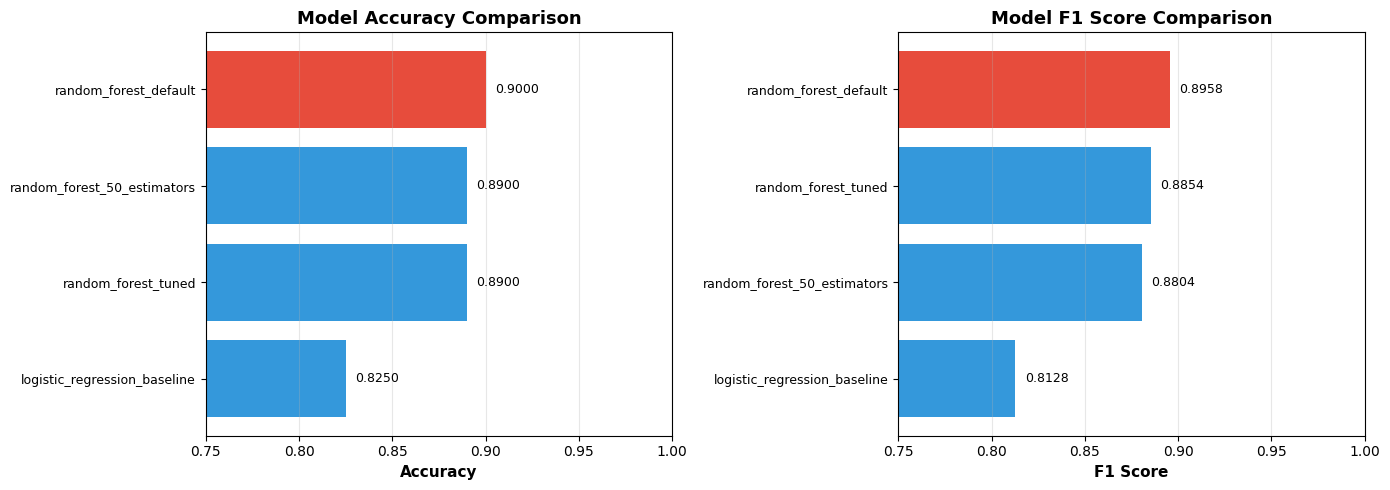

Experiment comparison visualizations created!


In [9]:
# Visualization 1: Experiment Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Accuracy comparison
ax1 = axes[0]
experiments_df_sorted = experiments_df.sort_values('accuracy', ascending=True)
colors = ['#3498db' if i != experiments_df_sorted['accuracy'].idxmax() else '#e74c3c' 
          for i in experiments_df_sorted.index]

ax1.barh(range(len(experiments_df_sorted)), experiments_df_sorted['accuracy'], color=colors)
ax1.set_yticks(range(len(experiments_df_sorted)))
ax1.set_yticklabels(experiments_df_sorted['run_name'], fontsize=9)
ax1.set_xlabel('Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
ax1.set_xlim([0.75, 1.0])
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(experiments_df_sorted['accuracy']):
    ax1.text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=9)

# Plot 2: F1 Score comparison
ax2 = axes[1]
experiments_df_sorted_f1 = experiments_df.sort_values('f1_score', ascending=True)
colors_f1 = ['#3498db' if i != experiments_df_sorted_f1['f1_score'].idxmax() else '#e74c3c' 
             for i in experiments_df_sorted_f1.index]

ax2.barh(range(len(experiments_df_sorted_f1)), experiments_df_sorted_f1['f1_score'], color=colors_f1)
ax2.set_yticks(range(len(experiments_df_sorted_f1)))
ax2.set_yticklabels(experiments_df_sorted_f1['run_name'], fontsize=9)
ax2.set_xlabel('F1 Score', fontsize=11, fontweight='bold')
ax2.set_title('Model F1 Score Comparison', fontsize=13, fontweight='bold')
ax2.set_xlim([0.75, 1.0])
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(experiments_df_sorted_f1['f1_score']):
    ax2.text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("Experiment comparison visualizations created!")

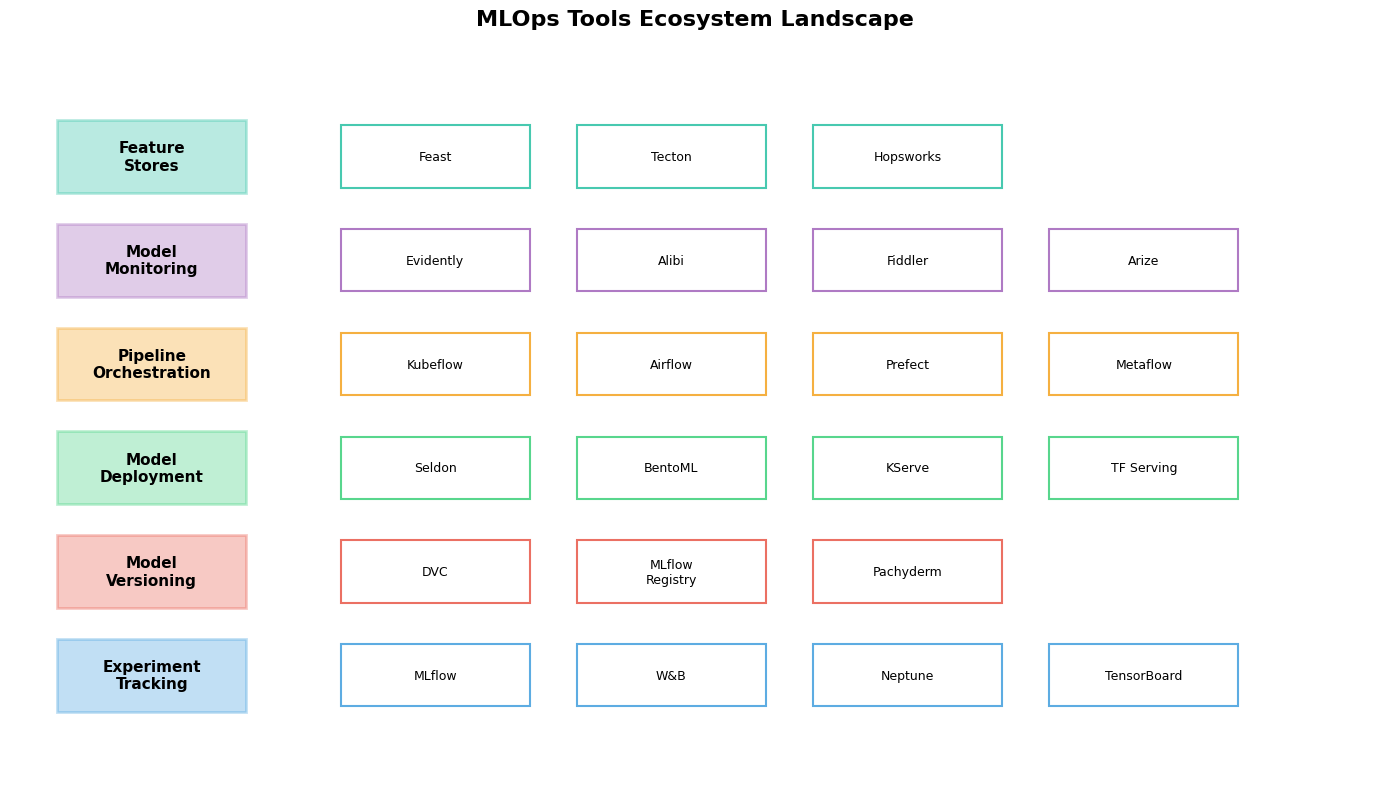

MLOps ecosystem visualization created!


In [10]:
# Visualization 2: MLOps Tools Ecosystem Overview
fig, ax = plt.subplots(figsize=(14, 8))

# Define categories and tools
categories = [
    'Experiment\nTracking',
    'Model\nVersioning',
    'Model\nDeployment',
    'Pipeline\nOrchestration',
    'Model\nMonitoring',
    'Feature\nStores'
]

tools_per_category = [
    ['MLflow', 'W&B', 'Neptune', 'TensorBoard'],
    ['DVC', 'MLflow\nRegistry', 'Pachyderm'],
    ['Seldon', 'BentoML', 'KServe', 'TF Serving'],
    ['Kubeflow', 'Airflow', 'Prefect', 'Metaflow'],
    ['Evidently', 'Alibi', 'Fiddler', 'Arize'],
    ['Feast', 'Tecton', 'Hopsworks']
]

# Create a visual representation
y_positions = np.arange(len(categories))
colors_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

# Draw category boxes
for i, (category, tools, color) in enumerate(zip(categories, tools_per_category, colors_palette)):
    # Main category box
    rect = plt.Rectangle((0, i-0.35), 2, 0.7, facecolor=color, alpha=0.3, edgecolor=color, linewidth=2)
    ax.add_patch(rect)
    ax.text(1, i, category, ha='center', va='center', fontsize=11, fontweight='bold')
    
    # Tool boxes
    for j, tool in enumerate(tools):
        x_pos = 3 + j * 2.5
        rect_tool = plt.Rectangle((x_pos, i-0.3), 2, 0.6, facecolor='white', 
                                   edgecolor=color, linewidth=1.5, alpha=0.8)
        ax.add_patch(rect_tool)
        ax.text(x_pos + 1, i, tool, ha='center', va='center', fontsize=9)

# Set limits and labels
ax.set_xlim(-0.5, 14)
ax.set_ylim(-1, len(categories))
ax.set_yticks([])
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('MLOps Tools Ecosystem Landscape', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("MLOps ecosystem visualization created!")

## Hands-On Activity: Evaluating MLOps Tools for Your Project

In this practical exercise, we'll create a decision framework for selecting MLOps tools based on project requirements.

In [11]:
# Create a tool evaluation framework
class MLOpsToolEvaluator:
    """Framework for evaluating MLOps tools based on project requirements"""
    
    def __init__(self):
        # Define evaluation criteria (scale: 1-5)
        self.tools_data = {
            'MLflow': {
                'ease_of_use': 5,
                'scalability': 4,
                'community_support': 5,
                'enterprise_features': 3,
                'cost': 5,  # 5 = free/open-source
                'integration': 5
            },
            'Weights & Biases': {
                'ease_of_use': 5,
                'scalability': 5,
                'community_support': 4,
                'enterprise_features': 5,
                'cost': 3,  # Free tier + paid
                'integration': 5
            },
            'Kubeflow': {
                'ease_of_use': 2,
                'scalability': 5,
                'community_support': 4,
                'enterprise_features': 5,
                'cost': 5,
                'integration': 4
            },
            'Neptune.ai': {
                'ease_of_use': 4,
                'scalability': 4,
                'community_support': 3,
                'enterprise_features': 4,
                'cost': 3,
                'integration': 4
            },
            'DVC': {
                'ease_of_use': 3,
                'scalability': 4,
                'community_support': 4,
                'enterprise_features': 3,
                'cost': 5,
                'integration': 4
            }
        }
    
    def evaluate(self, weights=None):
        """
        Evaluate tools based on weighted criteria
        
        Parameters:
        weights: dict with criterion weights (default: equal weights)
        """
        if weights is None:
            weights = {
                'ease_of_use': 1.0,
                'scalability': 1.0,
                'community_support': 1.0,
                'enterprise_features': 1.0,
                'cost': 1.0,
                'integration': 1.0
            }
        
        scores = {}
        for tool, criteria in self.tools_data.items():
            score = sum(criteria[c] * weights[c] for c in criteria.keys())
            score /= sum(weights.values())  # Normalize
            scores[tool] = score
        
        return pd.DataFrame([
            {'Tool': tool, 'Weighted Score': score} 
            for tool, score in sorted(scores.items(), key=lambda x: x[1], reverse=True)
        ])
    
    def get_details_df(self):
        """Get detailed scores as DataFrame"""
        return pd.DataFrame(self.tools_data).T

# Create evaluator
evaluator = MLOpsToolEvaluator()

# Show detailed scores
print("\nDetailed Tool Evaluation Scores (1-5 scale):")
print("="*70)
details_df = evaluator.get_details_df()
print(details_df.to_string())
print("="*70)


Detailed Tool Evaluation Scores (1-5 scale):
                  ease_of_use  scalability  community_support  enterprise_features  cost  integration
MLflow                      5            4                  5                    3     5            5
Weights & Biases            5            5                  4                    5     3            5
Kubeflow                    2            5                  4                    5     5            4
Neptune.ai                  4            4                  3                    4     3            4
DVC                         3            4                  4                    3     5            4


In [12]:
# Scenario 1: Startup with limited budget
print("\n📊 Scenario 1: Startup with limited budget")
print("-" * 60)
startup_weights = {
    'ease_of_use': 1.5,
    'scalability': 0.8,
    'community_support': 1.2,
    'enterprise_features': 0.5,
    'cost': 2.0,  # Very important!
    'integration': 1.0
}
startup_results = evaluator.evaluate(startup_weights)
print(startup_results.to_string(index=False))
print(f"\n✅ Recommended: {startup_results.iloc[0]['Tool']}")


📊 Scenario 1: Startup with limited budget
------------------------------------------------------------
            Tool  Weighted Score
          MLflow        4.742857
Weights & Biases        4.257143
        Kubeflow        4.042857
             DVC        4.000000
      Neptune.ai        3.542857

✅ Recommended: MLflow


In [13]:
# Scenario 2: Enterprise with complex requirements
print("\n📊 Scenario 2: Enterprise with complex requirements")
print("-" * 60)
enterprise_weights = {
    'ease_of_use': 0.8,
    'scalability': 2.0,  # Critical!
    'community_support': 1.0,
    'enterprise_features': 2.0,  # Critical!
    'cost': 0.5,
    'integration': 1.5
}
enterprise_results = evaluator.evaluate(enterprise_weights)
print(enterprise_results.to_string(index=False))
print(f"\n✅ Recommended: {enterprise_results.iloc[0]['Tool']}")


📊 Scenario 2: Enterprise with complex requirements
------------------------------------------------------------
            Tool  Weighted Score
Weights & Biases        4.743590
        Kubeflow        4.371795
          MLflow        4.230769
      Neptune.ai        3.807692
             DVC        3.705128

✅ Recommended: Weights & Biases


In [14]:
# Scenario 3: Research team prioritizing collaboration
print("\n📊 Scenario 3: Research team prioritizing collaboration")
print("-" * 60)
research_weights = {
    'ease_of_use': 2.0,  # Important for researchers
    'scalability': 0.8,
    'community_support': 1.5,
    'enterprise_features': 0.5,
    'cost': 1.5,
    'integration': 1.5
}
research_results = evaluator.evaluate(research_weights)
print(research_results.to_string(index=False))
print(f"\n✅ Recommended: {research_results.iloc[0]['Tool']}")


📊 Scenario 3: Research team prioritizing collaboration
------------------------------------------------------------
            Tool  Weighted Score
          MLflow        4.769231
Weights & Biases        4.423077
             DVC        3.871795
        Kubeflow        3.846154
      Neptune.ai        3.615385

✅ Recommended: MLflow


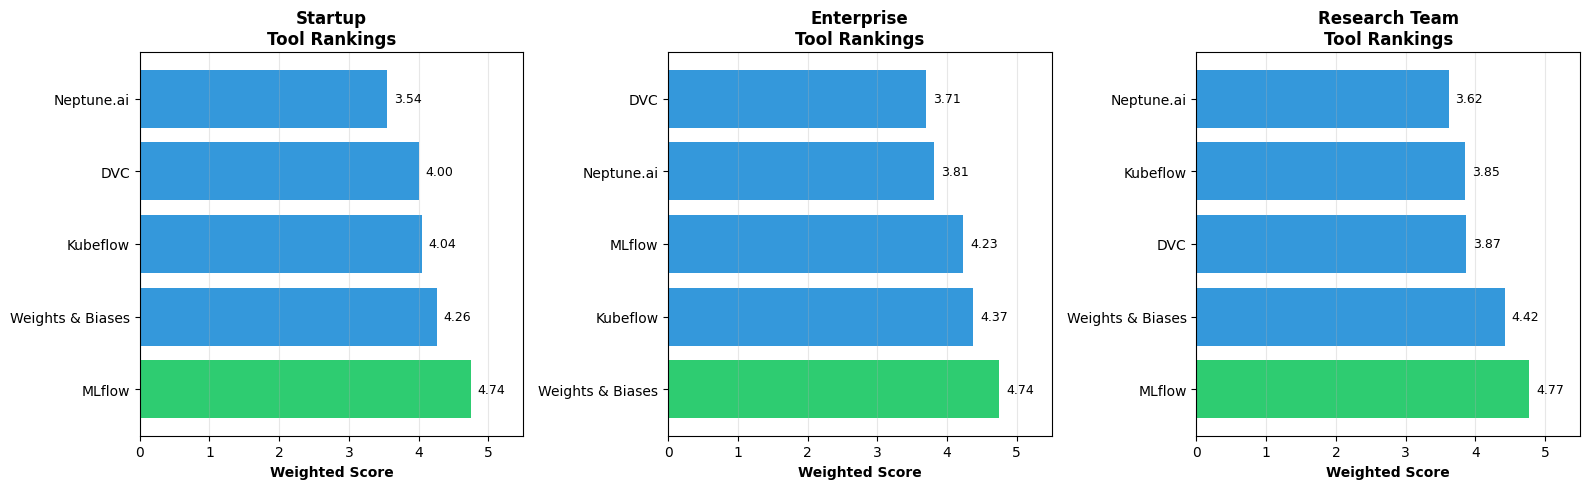


✓ Tool evaluation complete for all scenarios!


In [15]:
# Visualize the comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
scenarios = [
    ('Startup', startup_results),
    ('Enterprise', enterprise_results),
    ('Research Team', research_results)
]

for idx, (scenario_name, results) in enumerate(scenarios):
    ax = axes[idx]
    colors_bar = ['#2ecc71' if i == 0 else '#3498db' for i in range(len(results))]
    
    ax.barh(results['Tool'], results['Weighted Score'], color=colors_bar)
    ax.set_xlabel('Weighted Score', fontweight='bold')
    ax.set_title(f'{scenario_name}\nTool Rankings', fontweight='bold', fontsize=12)
    ax.set_xlim([0, 5.5])
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (tool, score) in enumerate(zip(results['Tool'], results['Weighted Score'])):
        ax.text(score + 0.1, i, f'{score:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✓ Tool evaluation complete for all scenarios!")

## Key Takeaways

After completing this lesson, here are the essential points to remember:

1. **MLOps Tools Span the Entire ML Lifecycle**: From experiment tracking to model monitoring, there are specialized tools for each phase of ML development and deployment.

2. **No One-Size-Fits-All Solution**: Tool selection depends on your specific requirements including team size, budget, technical expertise, and scalability needs.

3. **Experiment Tracking is Fundamental**: Systematic tracking of experiments, parameters, and metrics is crucial for reproducibility and continuous improvement.

4. **Scalability and Efficiency Matter**: Understanding the mathematical principles behind tool performance helps in making informed decisions for production systems.

5. **Integration and Interoperability are Key**: Modern MLOps platforms often work together; choosing tools that integrate well can significantly improve workflow efficiency.

6. **Open Source vs. Enterprise**: Open-source tools like MLflow and DVC offer excellent starting points, while enterprise solutions provide additional support and features for large-scale deployments.

7. **The Landscape is Evolving**: New tools and platforms emerge regularly; staying informed about the ecosystem helps you adopt best practices and leverage cutting-edge capabilities.

### What You Should Now Be Able To Do:

- ✅ Categorize MLOps tools by their primary functions
- ✅ Evaluate tools based on project-specific requirements
- ✅ Implement basic experiment tracking workflows
- ✅ Understand scalability and efficiency considerations
- ✅ Make informed decisions about MLOps tool adoption

## Further Resources

To deepen your understanding of MLOps tools and platforms, explore these resources:

### Documentation and Tutorials

1. **MLflow Official Documentation**: [https://mlflow.org/docs/latest/index.html](https://mlflow.org/docs/latest/index.html)
   - Comprehensive guide to MLflow's tracking, projects, models, and registry components

2. **Kubeflow Documentation**: [https://www.kubeflow.org/docs/](https://www.kubeflow.org/docs/)
   - Learn about ML workflows on Kubernetes

3. **Weights & Biases Tutorials**: [https://docs.wandb.ai/](https://docs.wandb.ai/)
   - Interactive tutorials on experiment tracking and model management

### Comparative Analyses

4. **Neptune.ai's MLOps Tools Landscape**: [https://neptune.ai/blog/mlops-tools-landscape](https://neptune.ai/blog/mlops-tools-landscape)
   - Comprehensive comparison of MLOps tools across categories

5. **DataCamp's Guide to MLOps Tools**: [https://www.datacamp.com/tutorial/mlops-tools](https://www.datacamp.com/tutorial/mlops-tools)
   - Overview of 17 top MLOps tools with use cases

### Academic Papers and Research

6. **"Hidden Technical Debt in Machine Learning Systems"** (Google Research)
   - Foundational paper on challenges in ML systems that MLOps addresses

7. **"Machine Learning Operations (MLOps): Overview, Definition, and Architecture"** (IEEE)
   - Academic perspective on MLOps principles and architecture

### Community and Practical Learning

8. **MLOps Community**: [https://mlops.community/](https://mlops.community/)
   - Join discussions, attend meetups, and learn from practitioners

9. **Full Stack Deep Learning**: [https://fullstackdeeplearning.com/](https://fullstackdeeplearning.com/)
   - Practical course on production ML systems

10. **Made With ML**: [https://madewithml.com/](https://madewithml.com/)
    - Comprehensive MLOps curriculum with hands-on projects

### Next Steps

Continue your MLOps journey by:
- Setting up a personal MLflow server to track your experiments
- Exploring DVC for data and model versioning
- Building a complete ML pipeline using one of the orchestration tools
- Implementing model monitoring in a production-like environment

Remember: The best way to learn MLOps tools is through hands-on practice. Start with a simple project and gradually incorporate more sophisticated tools as your needs grow!